In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as se 
import sklearn as sk 
import pandas_profiling as pf
import os 
import statsmodels.formula.api as smf
% matplotlib inline 
plt.rcParams["figure.figsize"]=10,7.5
plt.rcParams["axes.grid"]=True
plt.gray()

from sklearn.cross_validation import train_test_split
import scipy.stats as stat
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression

In [4]:
os.chdir('G:\\EIP Classes\\analytics\\AnalytixLabs-Bangalore_Moin\\NGO Churn Classification and Segmentation\\1 - Data for Churn Modeling')

## Data Exploratory Analysis and Data Preprocessing:-

In [5]:
comclas=pd.read_sas("comclas.sas7bdat")
comclas

,CLASCODE,CLASDESC
0,b'CT',b'CTS-item'
1,b'RI',b'Request for information'
2,b'CM',b'Complaint'
3,b'TA',b'Threath / Accusation'
4,b'AK',b'Acknowledgement'
5,b'RM',b'Reminder'
6,b'ID',b'Information delivery'
7,b'AN',b'Answer'


In [5]:
commaint=pd.read_sas("commaint.sas7bdat")
commaint.head()

,MNTOPCODE,MNTOPDESC
0,b'CAN',b'Cancellations/replacements'
1,b'DIS',b'Discontinuations'
2,b'MKT',b'Marketing - Enquiries'
3,b'GEN',b'General'
4,b'NEW',b'New relations'


In [6]:
commediu=pd.read_sas("commediu.sas7bdat")
commediu

,MEDIUMCODE,MEDIUMDESC
0,b'FF',b'Face to Face contact'
1,b'FX',b'Fax'
2,b'TX',b'Telex'
3,b'EM',b'Electronic Mail'
4,b'TE',b'Telephone call'
5,b'ES',b'Express mail'
6,b'AM',b'Answering machine'
7,b'RM',b'Regular mail (CTS-items only)'
8,b'AF',b'Application form'
9,b'LE',b'Letters'


In [7]:
communication=pd.read_sas("communication.sas7bdat")
communication.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,b'000405402',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-05-09
1,b'000430904',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-06-14
2,b'000592732',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
3,b'000593375',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
4,b'000618514',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-11-28


In [8]:
extrelty=pd.read_sas("extrelty.sas7bdat")
extrelty.head()

,EXRELACTCD,EXRELACTDE
0,b'FP',b'CommitmentDo'
1,b'PS',b'Prospect'
2,b'PF',b'Prosp Fundra'
3,b'PP',b'Prosp Promot'
4,b'GR',b'Grantor'


In [9]:
extrel=pd.read_sas("extrel.sas7bdat")
extrel.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,b'0026414',b'CT',1995-02-02,NaT
1,b'0026419',b'FP',1992-03-01,NaT
2,b'0026424',b'FP',1992-03-01,1996-12-24
3,b'0026430',b'FP',1992-03-01,2006-01-31
4,b'0026430',b'CT',1997-03-07,NaT


In [10]:
extrel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26689 entries, 0 to 26688
Data columns (total 4 columns):
EXTRELNO      26689 non-null object
EXRELACTCD    26689 non-null object
EXTRELSTDT    26689 non-null datetime64[ns]
EXRELDATEN    10168 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 834.1+ KB


In [11]:
extrelty=pd.read_sas("extrelty.sas7bdat")
extrelty.head()

,EXRELACTCD,EXRELACTDE
0,b'FP',b'CommitmentDo'
1,b'PS',b'Prospect'
2,b'PF',b'Prosp Fundra'
3,b'PP',b'Prosp Promot'
4,b'GR',b'Grantor'


In [12]:
nameaddr=pd.read_sas("nameaddr.sas7bdat")
nameaddr.head()


,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,b'0000019',b'HR',b'2500',b'NL'
1,b'0000020',b'HR',b'9550',b'NL'
2,b'0000035',b'HM',b'2150',b'NL'
3,b'0000042',b'FA',b'3012',b'NL'
4,b'0000043',b'MW',b'3000',b'NL'


In [5]:
payhistory=pd.read_sas("payhistory.sas7bdat")
payhistory.columns=["Payment_id","Date_of_payment","Payment_amt","cust_id","Pay_type","Status_of_payment"]

NameError: name 'pd' is not defined

In [14]:
payhistory.head()

,Payment_id,Date_of_payment,Payment_amt,cust_id,Pay_type,Status_of_payment
0,38.0,1993-12-31,9.57,b'0000019',b'X',b'CO'
1,39.0,1993-12-31,41.32,b'0000020',b'X',b'CO'
2,40.0,1993-12-31,13.10,b'0000020',b'X',b'CO'
3,54091.0,1994-01-01,2.02,b'0000020',b'X',b'CO'
4,104480.0,1994-05-19,0.50,b'0000020',b'D',b'OK'


In [4]:
extrel.columns=["cust_id","Activity_code","Rel_start_date","Rel_end_date"]

NameError: name 'extrel' is not defined

In [16]:
extrel.head()

,cust_id,Activity_code,Rel_start_date,Rel_end_date
0,b'0026414',b'CT',1995-02-02,NaT
1,b'0026419',b'FP',1992-03-01,NaT
2,b'0026424',b'FP',1992-03-01,1996-12-24
3,b'0026430',b'FP',1992-03-01,2006-01-31
4,b'0026430',b'CT',1997-03-07,NaT


In [17]:
pd.DataFrame(extrel.Activity_code.value_counts()).reset_index()

,index,Activity_code
0,b'FP',11442
1,b'PS',10677
2,b'CT',3325
3,b'MR',1110
4,b'TR',45
5,b'AP',37
6,b'SP',13
7,b'PF',9
8,b'OR',7
9,b'PO',5


In [18]:
# Mapping:-
mapping={b'FP':b'CommitmentDo',b'PS':b'Prospect',b'PF':b'Prosp Fundra',
        b'PP':b'Prosp Promot',b'GR':b'Grantor',b'CT':b'Contributor',b'FR':b'Friend',
        b'AP':b'Active Press',b'SP':b'Supplier',b'TR':b'Translator',b'FN':b'Fan',b'**':b'*No Relation',
        b'MG':b'Mbr FP group',b'IV':b'Volun Intern',b'RV':b'VoluntRegion',b'PV':b'Volunt Prosp',
        b'BM':b'Board Member',b'CP':b'ConfirmProsp',b'PM':b'Promotor',b'PT':b'Prosp Transl',b'OR':b'Organization',
        b'PO':b'Plan Office',b'OI':b'Offic Inst',b'JS':b'Job sollicit',b'MR':b'Mag Reader',b'PC':b'Prosp Contr'}

In [19]:
mapping

{b'**': b'*No Relation',
 b'AP': b'Active Press',
 b'BM': b'Board Member',
 b'CP': b'ConfirmProsp',
 b'CT': b'Contributor',
 b'FN': b'Fan',
 b'FP': b'CommitmentDo',
 b'FR': b'Friend',
 b'GR': b'Grantor',
 b'IV': b'Volun Intern',
 b'JS': b'Job sollicit',
 b'MG': b'Mbr FP group',
 b'MR': b'Mag Reader',
 b'OI': b'Offic Inst',
 b'OR': b'Organization',
 b'PC': b'Prosp Contr',
 b'PF': b'Prosp Fundra',
 b'PM': b'Promotor',
 b'PO': b'Plan Office',
 b'PP': b'Prosp Promot',
 b'PS': b'Prospect',
 b'PT': b'Prosp Transl',
 b'PV': b'Volunt Prosp',
 b'RV': b'VoluntRegion',
 b'SP': b'Supplier',
 b'TR': b'Translator'}

In [20]:
extrel["Activity_desc"]=extrel["Activity_code"].apply(lambda x: mapping[x])

In [21]:
extrel.head()

,cust_id,Activity_code,Rel_start_date,Rel_end_date,Activity_desc
0,b'0026414',b'CT',1995-02-02,NaT,b'Contributor'
1,b'0026419',b'FP',1992-03-01,NaT,b'CommitmentDo'
2,b'0026424',b'FP',1992-03-01,1996-12-24,b'CommitmentDo'
3,b'0026430',b'FP',1992-03-01,2006-01-31,b'CommitmentDo'
4,b'0026430',b'CT',1997-03-07,NaT,b'Contributor'


In [1]:
final_data=extrel

In [23]:
final_data.head()

,cust_id,Activity_code,Rel_start_date,Rel_end_date,Activity_desc
0,b'0026414',b'CT',1995-02-02,NaT,b'Contributor'
1,b'0026419',b'FP',1992-03-01,NaT,b'CommitmentDo'
2,b'0026424',b'FP',1992-03-01,1996-12-24,b'CommitmentDo'
3,b'0026430',b'FP',1992-03-01,2006-01-31,b'CommitmentDo'
4,b'0026430',b'CT',1997-03-07,NaT,b'Contributor'


In [24]:
final_data=pd.merge(left=extrel,right=payhistory,on="cust_id",how="inner")

In [2]:
final_data.head()

In [3]:
print(pay.shape)


In [27]:
nameaddr.columns

Index(['EXTRELNO', 'NAME1TITLE', 'POSTCODE', 'LANGUACODE'], dtype='object')

In [28]:
nameaddr.columns=["cust_id","Cust_name","Post_code","Mailing_lang"]

In [29]:
final_data=pd.merge(left=final_data,right=nameaddr,on="cust_id",how="inner")

In [30]:
final_data.head()

,cust_id,Activity_code,Rel_start_date,Rel_end_date,Activity_desc,Payment_id,Date_of_payment,Payment_amt,Pay_type,Status_of_payment,Cust_name,Post_code,Mailing_lang
0,b'0026414',b'CT',1995-02-02,NaT,b'Contributor',40099.0,1993-12-31,10.58,b'X',b'CO',b'MW',b'8300',b'NL'
1,b'0026414',b'CT',1995-02-02,NaT,b'Contributor',77670.0,1994-01-01,2.02,b'X',b'CO',b'MW',b'8300',b'NL'
2,b'0026414',b'CT',1995-02-02,NaT,b'Contributor',115809.0,1994-05-19,0.50,b'D',b'OK',b'MW',b'8300',b'NL'
3,b'0026414',b'CT',1995-02-02,NaT,b'Contributor',139954.0,1994-06-14,0.50,b'D',b'OK',b'MW',b'8300',b'NL'
4,b'0026414',b'CT',1995-02-02,NaT,b'Contributor',162748.0,1994-07-05,0.50,b'D',b'OK',b'MW',b'8300',b'NL'


In [31]:
final_data.cust_id.count()

1283735

### Creating some new important Variables:-

In [32]:
temp=final_data.groupby("cust_id")
Monitary=pd.DataFrame(temp["Payment_amt"].sum())

In [33]:
Monitary.head()

,Payment_amt
cust_id,
b'0026414',3112.80
b'0026419',3155.05
b'0026424',524.85
b'0026430',5572.26
b'0026431',6101.22


In [34]:
temp=final_data.groupby("cust_id")
Frequency=pd.DataFrame(temp["Payment_amt"].count())

In [35]:
Frequency.head()

,Payment_amt
cust_id,
b'0026414',156
b'0026419',69
b'0026424',35
b'0026430',292
b'0026431',42


In [36]:
Avg_donation=Monitary/Frequency

In [37]:
Avg_donation.head()

,Payment_amt
cust_id,
b'0026414',19.953846
b'0026419',45.725362
b'0026424',14.995714
b'0026430',19.083082
b'0026431',145.267143


In [38]:
temp=final_data.groupby("cust_id")
Recent_date_of_pay=pd.DataFrame(temp["Date_of_payment"].max())

In [39]:
Recent_date_of_pay.head()

,Date_of_payment
cust_id,
b'0026414',2007-01-17
b'0026419',2007-01-02
b'0026424',1997-01-02
b'0026430',2005-10-18
b'0026431',2006-04-28


In [40]:
Recency=pd.DataFrame(pd.to_datetime("02/02/2007")-Recent_date_of_pay["Date_of_payment"])

In [41]:
Recency.head()

,Date_of_payment
cust_id,
b'0026414',16 days
b'0026419',31 days
b'0026424',3683 days
b'0026430',472 days
b'0026431',280 days


In [42]:
rfm_table=pd.concat([Monitary,Frequency,Avg_donation,Recency],axis=1)

In [43]:
rfm_table.columns=["Monitory","Frequency","Avg_donation","Recency"]

In [44]:
rfm_table=rfm_table.reset_index()

In [45]:
rfm_table.head()

,cust_id,Monitory,Frequency,Avg_donation,Recency
0,b'0026414',3112.80,156,19.953846,16 days
1,b'0026419',3155.05,69,45.725362,31 days
2,b'0026424',524.85,35,14.995714,3683 days
3,b'0026430',5572.26,292,19.083082,472 days
4,b'0026431',6101.22,42,145.267143,280 days


In [46]:
rfm_table.cust_id.duplicated().any()

False

In [47]:
rfm_table=pd.merge(left=rfm_table,right=nameaddr,on="cust_id",how="left")

In [48]:
rfm_table.head()

,cust_id,Monitory,Frequency,Avg_donation,Recency,Cust_name,Post_code,Mailing_lang
0,b'0026414',3112.80,156,19.953846,16 days,b'MW',b'8300',b'NL'
1,b'0026419',3155.05,69,45.725362,31 days,b'HM',b'2600',b'NL'
2,b'0026424',524.85,35,14.995714,3683 days,b'MW',b'1932',b'NL'
3,b'0026430',5572.26,292,19.083082,472 days,b'HM',b'2040',b'NL'
4,b'0026431',6101.22,42,145.267143,280 days,b'FA',b'8520',b'NL'


In [49]:
rfm_table.cust_id.duplicated().any()

False

In [50]:
rfm_table=pd.merge(left=rfm_table,right=extrel,on="cust_id",how="inner")

In [51]:
rfm_table.head()

,cust_id,Monitory,Frequency,Avg_donation,Recency,Cust_name,Post_code,Mailing_lang,Activity_code,Rel_start_date,Rel_end_date,Activity_desc
0,b'0026414',3112.80,156,19.953846,16 days,b'MW',b'8300',b'NL',b'CT',1995-02-02,NaT,b'Contributor'
1,b'0026419',3155.05,69,45.725362,31 days,b'HM',b'2600',b'NL',b'FP',1992-03-01,NaT,b'CommitmentDo'
2,b'0026424',524.85,35,14.995714,3683 days,b'MW',b'1932',b'NL',b'FP',1992-03-01,1996-12-24,b'CommitmentDo'
3,b'0026430',5572.26,292,19.083082,472 days,b'HM',b'2040',b'NL',b'FP',1992-03-01,2006-01-31,b'CommitmentDo'
4,b'0026430',5572.26,292,19.083082,472 days,b'HM',b'2040',b'NL',b'CT',1997-03-07,NaT,b'Contributor'


In [52]:
rfm_table[['Monitory',"Avg_donation"]]=abs(rfm_table[['Monitory',"Avg_donation"]])

In [53]:
rfm_table.head()

,cust_id,Monitory,Frequency,Avg_donation,Recency,Cust_name,Post_code,Mailing_lang,Activity_code,Rel_start_date,Rel_end_date,Activity_desc
0,b'0026414',3112.80,156,19.953846,16 days,b'MW',b'8300',b'NL',b'CT',1995-02-02,NaT,b'Contributor'
1,b'0026419',3155.05,69,45.725362,31 days,b'HM',b'2600',b'NL',b'FP',1992-03-01,NaT,b'CommitmentDo'
2,b'0026424',524.85,35,14.995714,3683 days,b'MW',b'1932',b'NL',b'FP',1992-03-01,1996-12-24,b'CommitmentDo'
3,b'0026430',5572.26,292,19.083082,472 days,b'HM',b'2040',b'NL',b'FP',1992-03-01,2006-01-31,b'CommitmentDo'
4,b'0026430',5572.26,292,19.083082,472 days,b'HM',b'2040',b'NL',b'CT',1997-03-07,NaT,b'Contributor'


In [54]:
rfm_table=rfm_table.loc[-rfm_table["cust_id"].duplicated()]

In [55]:
rfm_table.cust_id.duplicated().any()

False

In [56]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 18610
Data columns (total 12 columns):
cust_id           10855 non-null object
Monitory          10855 non-null float64
Frequency         10855 non-null int64
Avg_donation      10855 non-null float64
Recency           10855 non-null timedelta64[ns]
Cust_name         10591 non-null object
Post_code         10809 non-null object
Mailing_lang      10855 non-null object
Activity_code     10855 non-null object
Rel_start_date    10855 non-null datetime64[ns]
Rel_end_date      7269 non-null datetime64[ns]
Activity_desc     10855 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(6), timedelta64[ns](1)
memory usage: 1.1+ MB


In [57]:
x=pd.DataFrame(pd.to_numeric(rfm_table['Rel_end_date']))

In [58]:
x.head()

,Rel_end_date
0,-9223372036854775808
1,-9223372036854775808
2,851385600000000000
3,1138665600000000000
5,-9223372036854775808


In [59]:
rfm_table["churn"]=np.where(x.Rel_end_date==-9223372036854775808,0,1)

In [60]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 18610
Data columns (total 13 columns):
cust_id           10855 non-null object
Monitory          10855 non-null float64
Frequency         10855 non-null int64
Avg_donation      10855 non-null float64
Recency           10855 non-null timedelta64[ns]
Cust_name         10591 non-null object
Post_code         10809 non-null object
Mailing_lang      10855 non-null object
Activity_code     10855 non-null object
Rel_start_date    10855 non-null datetime64[ns]
Rel_end_date      7269 non-null datetime64[ns]
Activity_desc     10855 non-null object
churn             10855 non-null int32
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(6), timedelta64[ns](1)
memory usage: 1.1+ MB


In [61]:
import time

In [62]:
import datetime

In [63]:
np.array([datetime.timedelta(1)], dtype="timedelta64[ms]")[0]

numpy.timedelta64(86400000,'ms')

In [64]:
rfm_table["Recency"]=pd.DataFrame(rfm_table['Recency'].astype('timedelta64[D]'),columns=["Recency"])

In [65]:
rfm_table.head()

,cust_id,Monitory,Frequency,Avg_donation,Recency,Cust_name,Post_code,Mailing_lang,Activity_code,Rel_start_date,Rel_end_date,Activity_desc,churn
0,b'0026414',3112.80,156,19.953846,16.0,b'MW',b'8300',b'NL',b'CT',1995-02-02,NaT,b'Contributor',0
1,b'0026419',3155.05,69,45.725362,31.0,b'HM',b'2600',b'NL',b'FP',1992-03-01,NaT,b'CommitmentDo',0
2,b'0026424',524.85,35,14.995714,3683.0,b'MW',b'1932',b'NL',b'FP',1992-03-01,1996-12-24,b'CommitmentDo',1
3,b'0026430',5572.26,292,19.083082,472.0,b'HM',b'2040',b'NL',b'FP',1992-03-01,2006-01-31,b'CommitmentDo',1
5,b'0026431',6101.22,42,145.267143,280.0,b'FA',b'8520',b'NL',b'FP',1992-03-01,NaT,b'CommitmentDo',0


### Seprating Numerical variable:-

In [66]:
# Seperating numeric var:-


num_var_names=[key for key in dict(rfm_table.dtypes) if dict(rfm_table.dtypes)[key] in ["float64","int64","float32","int32"]]

In [67]:
num_var_names

['Monitory', 'Frequency', 'Avg_donation', 'Recency', 'churn']

In [68]:
num_var=rfm_table[num_var_names]

In [69]:
num_var.head()

,Monitory,Frequency,Avg_donation,Recency,churn
0,3112.80,156,19.953846,16.0,0
1,3155.05,69,45.725362,31.0,0
2,524.85,35,14.995714,3683.0,1
3,5572.26,292,19.083082,472.0,1
5,6101.22,42,145.267143,280.0,0


In [70]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [71]:
num_var.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Monitory,10855.0,0.0,3.426295e+07,3156.420740,2906.330000,2724.855943,7.424840e+06,0.0,5.540000,150.000000,365.914000,1108.00,2906.330000,4717.240000,6193.4,7347.4080,11075.9376,65386.2
Frequency,10855.0,0.0,1.283735e+06,118.262091,81.000000,120.260696,1.446263e+04,1.0,1.000000,5.000000,11.000000,30.00,81.000000,160.500000,288.0,312.0000,463.3800,2973.0
Avg_donation,10855.0,0.0,4.502089e+05,41.474799,22.297093,48.469585,2.349301e+03,0.0,2.015386,14.957909,18.226552,20.33,22.297093,39.448424,92.0,148.2901,263.9775,600.0
Recency,10855.0,0.0,8.745825e+06,805.695532,44.000000,1288.535844,1.660325e+06,9.0,16.000000,16.000000,16.000000,16.00,44.000000,1352.500000,3030.0,3842.6000,4780.0000,4781.0
churn,10855.0,0.0,7.269000e+03,0.669645,1.000000,0.470362,2.212408e-01,0.0,0.000000,0.000000,0.000000,0.00,1.000000,1.000000,1.0,1.0000,1.0000,1.0


### Outliers Treatment:-

In [72]:
# outliers treatment:-
def outliers_treat(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.01))
    return x
    

In [73]:
num_var=num_var.apply(outliers_treat)

In [74]:
num_var.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Monitory,10855.0,0.0,3.373292e+07,3107.593027,2906.330000,2417.300238,5.843340e+06,5.540000,5.540000,150.000000,365.914000,1108.00,2906.330000,4717.240000,6193.4,7347.4080,11074.804896,11075.9376
Frequency,10855.0,0.0,1.259995e+06,116.075119,81.000000,106.960852,1.144062e+04,1.000000,1.000000,5.000000,11.000000,30.00,81.000000,160.500000,288.0,312.0000,462.634800,463.3800
Avg_donation,10855.0,0.0,4.483797e+05,41.306284,22.297093,47.473856,2.253767e+03,2.015386,2.015563,14.957909,18.226552,20.33,22.297093,39.448424,92.0,148.2901,263.977500,263.9775
Recency,10855.0,0.0,8.746090e+06,805.719945,44.000000,1288.490155,1.660207e+06,16.000000,16.000000,16.000000,16.000000,16.00,44.000000,1352.500000,3030.0,3842.6000,4780.000000,4780.0000
churn,10855.0,0.0,7.269000e+03,0.669645,1.000000,0.470362,2.212408e-01,0.000000,0.000000,0.000000,0.000000,0.00,1.000000,1.000000,1.0,1.0000,1.000000,1.0000


### Handling Categorical Features:-

In [75]:
cat_var_name=[key for key in dict(rfm_table.dtypes) if dict(rfm_table.dtypes)[key] in ["object"]]

In [76]:
cat_var_name

['cust_id',
 'Cust_name',
 'Post_code',
 'Mailing_lang',
 'Activity_code',
 'Activity_desc']

In [77]:
cat_var_name=['cust_id','Mailing_lang','Activity_desc']

In [78]:
cat_var=rfm_table[cat_var_name]

In [79]:
cat_var.head()

,cust_id,Mailing_lang,Activity_desc
0,b'0026414',b'NL',b'Contributor'
1,b'0026419',b'NL',b'CommitmentDo'
2,b'0026424',b'NL',b'CommitmentDo'
3,b'0026430',b'NL',b'CommitmentDo'
5,b'0026431',b'NL',b'CommitmentDo'


In [80]:
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 18610
Data columns (total 3 columns):
cust_id          10855 non-null object
Mailing_lang     10855 non-null object
Activity_desc    10855 non-null object
dtypes: object(3)
memory usage: 339.2+ KB


In [81]:
# Converting categorical Var into numerical Var:-

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

In [82]:
encoder=LabelEncoder()

In [83]:
cat_var=cat_var.apply(encoder.fit_transform)

In [84]:
cat_var.head()

,cust_id,Mailing_lang,Activity_desc
0,0,1,2
1,1,1,1
2,2,1,1
3,3,1,1
5,4,1,1


In [85]:
churn_final=pd.concat([num_var,cat_var],axis=1)

In [86]:
churn_final.head()

,Monitory,Frequency,Avg_donation,Recency,churn,cust_id,Mailing_lang,Activity_desc
0,3112.80,156.0,19.953846,16.0,0.0,0,1,2
1,3155.05,69.0,45.725362,31.0,0.0,1,1,1
2,524.85,35.0,14.995714,3683.0,1.0,2,1,1
3,5572.26,292.0,19.083082,472.0,1.0,3,1,1
5,6101.22,42.0,145.267143,280.0,0.0,4,1,1


### Variable Reduction:-

In [87]:
# Finding correlation matrix:-

corr=churn_final.corr()

In [88]:
corr

,Monitory,Frequency,Avg_donation,Recency,churn,cust_id,Mailing_lang,Activity_desc
Monitory,1.000000,0.799506,0.091512,-0.451401,0.122514,-0.311336,0.014871,0.377436
Frequency,0.799506,1.000000,-0.331242,-0.372674,0.097828,-0.295243,0.004991,0.293710
Avg_donation,0.091512,-0.331242,1.000000,-0.052266,-0.003344,0.038685,0.015089,0.060508
Recency,-0.451401,-0.372674,-0.052266,1.000000,0.399234,-0.336728,-0.011872,-0.053802
churn,0.122514,0.097828,-0.003344,0.399234,1.000000,-0.030101,-0.103983,0.670773
cust_id,-0.311336,-0.295243,0.038685,-0.336728,-0.030101,1.000000,-0.130757,0.198057
Mailing_lang,0.014871,0.004991,0.015089,-0.011872,-0.103983,-0.130757,1.000000,-0.159076
Activity_desc,0.377436,0.293710,0.060508,-0.053802,0.670773,0.198057,-0.159076,1.000000


In [89]:
import seaborn as sns

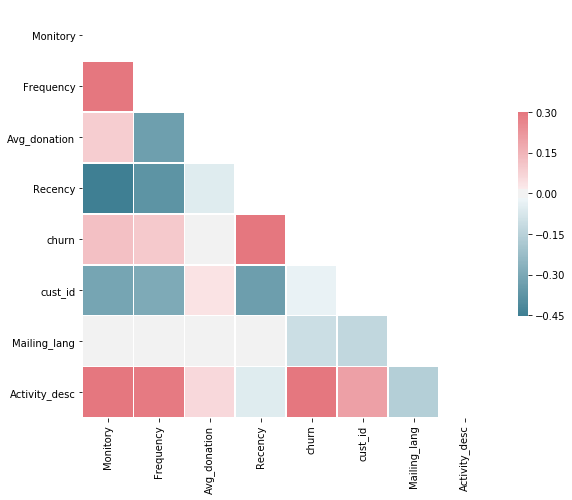

In [90]:
plt.rcParams["figure.figsize"]=10,7.5

# Generate a mask for the upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# Generate a custom diverging colormap
cmap=sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Data Reduction By Using Random Forest Feature Importance:-

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
train_x,test_x,train_y,test_y=train_test_split(churn_final[churn_final.columns.difference(["churn"])],churn_final["churn"],test_size=0.3,random_state=42)

In [92]:
rf_model=RandomForestClassifier(n_estimators=100).fit(train_x,train_y)

In [93]:
feature_imp=pd.DataFrame({"var":train_x.columns,"importance":rf_model.feature_importances_}).sort_values(["importance"],ascending=False)

In [94]:
feature_imp

,importance,var
0,0.431917,Activity_desc
5,0.271125,Recency
4,0.097658,Monitory
6,0.084034,cust_id
1,0.063557,Avg_donation
2,0.050607,Frequency
3,0.001101,Mailing_lang


In [95]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 18610
Data columns (total 13 columns):
cust_id           10855 non-null object
Monitory          10855 non-null float64
Frequency         10855 non-null int64
Avg_donation      10855 non-null float64
Recency           10855 non-null float64
Cust_name         10591 non-null object
Post_code         10809 non-null object
Mailing_lang      10855 non-null object
Activity_code     10855 non-null object
Rel_start_date    10855 non-null datetime64[ns]
Rel_end_date      7269 non-null datetime64[ns]
Activity_desc     10855 non-null object
churn             10855 non-null int32
dtypes: datetime64[ns](2), float64(3), int32(1), int64(1), object(6)
memory usage: 1.4+ MB


###  Creating dependent Var:-

In [96]:
churn_final["Date"]=rfm_table["Rel_start_date"]

In [97]:
churn_final=churn_final.sort_values(["Date"],ascending=True)

In [98]:
churn_final.head()

,Monitory,Frequency,Avg_donation,Recency,churn,cust_id,Mailing_lang,Activity_desc,Date
68,2809.13,141.0,19.922908,442.0,1.0,51,1,1,1992-03-01
39,3132.11,158.0,19.823481,16.0,0.0,29,1,1,1992-03-01
40,3115.10,156.0,19.968590,23.0,0.0,30,1,1,1992-03-01
41,641.08,50.0,12.821600,4013.0,0.0,31,1,2,1992-03-01
43,3109.12,157.0,19.803312,16.0,0.0,32,1,1,1992-03-01


In [99]:
import statsmodels.formula.api as smf

In [100]:
train=churn_final[churn_final["Date"]<=pd.to_datetime("2003-01-01")]

In [101]:
train.shape

(9201, 9)

In [102]:
test=churn_final[(churn_final["Date"]>=pd.to_datetime("2003-01-01")) & (churn_final["Date"]<=pd.to_datetime("2005-01-01"))]

In [103]:
test.shape

(968, 9)

In [104]:
out_of_sample=churn_final[churn_final["Date"]>=pd.to_datetime("2005-01-01")]

In [105]:
out_of_sample.shape

(790, 9)

## Applying Binary Logistic Regression:-

In [106]:
logit_model=smf.logit("churn~Activity_desc+Recency+Monitory+Avg_donation+Frequency+Mailing_lang",train).fit()

Optimization terminated successfully.
         Current function value: 0.129576
         Iterations 10


In [107]:
print(logit_model.summary2())

                         Results: Logit
Model:              Logit            No. Iterations:   10.0000  
Dependent Variable: churn            Pseudo R-squared: 0.783    
Date:               2018-08-26 19:25 AIC:              2398.4543
No. Observations:   9201             BIC:              2448.3438
Df Model:           6                Log-Likelihood:   -1192.2  
Df Residuals:       9194             LL-Null:          -5506.6  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -3.5949   0.2934 -12.2533 0.0000 -4.1699 -3.0198
Activity_desc    1.4386   0.0434  33.1155 0.0000  1.3535  1.5238
Recency          0.0038   0.0001  26.6417 0.0000  0.0035  0.0040
Monitory         0.0001   0.0001   1.1753 0.2399 -0.0000  0.0002
Avg_donation    -0.0084   0.0020  -4.1414 0.0000 -

In [108]:
train_model=smf.logit("churn~Activity_desc+Recency+Avg_donation",train).fit()

Optimization terminated successfully.
         Current function value: 0.129779
         Iterations 10


In [109]:
print(train_model.summary2())

                         Results: Logit
Model:              Logit            No. Iterations:   10.0000  
Dependent Variable: churn            Pseudo R-squared: 0.783    
Date:               2018-08-26 19:25 AIC:              2396.2023
No. Observations:   9201             BIC:              2424.7106
Df Model:           3                Log-Likelihood:   -1194.1  
Df Residuals:       9197             LL-Null:          -5506.6  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -3.7444   0.1007 -37.1943 0.0000 -3.9417 -3.5471
Activity_desc    1.4594   0.0422  34.5985 0.0000  1.3767  1.5420
Recency          0.0037   0.0001  27.0633 0.0000  0.0035  0.0040
Avg_donation    -0.0077   0.0013  -5.8571 0.0000 -0.0103 -0.0051



In [110]:
test_model=smf.logit("churn~Activity_desc+Recency+Avg_donation",test).fit()

Optimization terminated successfully.
         Current function value: 0.084849
         Iterations 10


In [111]:
print(test_model.summary2())

                        Results: Logit
Model:              Logit            No. Iterations:   10.0000 
Dependent Variable: churn            Pseudo R-squared: 0.877   
Date:               2018-08-26 19:25 AIC:              172.2670
No. Observations:   968              BIC:              191.7679
Df Model:           3                Log-Likelihood:   -82.134 
Df Residuals:       964              LL-Null:          -667.49 
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      -5.6450   0.4320 -13.0681 0.0000 -6.4916 -4.7983
Activity_desc   2.0915   0.2443   8.5598 0.0000  1.6126  2.5704
Recency         0.0206   0.0024   8.6797 0.0000  0.0160  0.0253
Avg_donation   -0.0252   0.0055  -4.5417 0.0000 -0.0360 -0.0143



In [112]:
train["pred"]=train_model.predict()
test["pred"]=test_model.predict()

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [113]:
from sklearn import metrics

### Checking Accracy of model :-

#### Using Area Under The Curve:-

In [114]:
metrics.roc_auc_score(train["churn"],train["pred"])

0.9852751730190382

In [115]:
metrics.roc_auc_score(test["churn"],test["pred"])

0.994462001504891

### Checkin Model Performance For out of sample Data:-

In [116]:
out_sample_model=smf.logit("churn~Activity_desc+Recency+Avg_donation",out_of_sample).fit()

Optimization terminated successfully.
         Current function value: 0.056515
         Iterations 11


In [117]:
out_of_sample["pred"]=out_sample_model.predict()

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Accuracy for Out of sample data:-

In [118]:
metrics.roc_auc_score(out_of_sample["churn"],out_of_sample["pred"])

0.9978552144427497

In [119]:
train_pred=pd.DataFrame([train["churn"],train["pred"]]).T
test_pred=pd.DataFrame([test["churn"],test["pred"]]).T

In [120]:
train.head()

,Monitory,Frequency,Avg_donation,Recency,churn,cust_id,Mailing_lang,Activity_desc,Date,pred
68,2809.13,141.0,19.922908,442.0,1.0,51,1,1,1992-03-01,0.311484
39,3132.11,158.0,19.823481,16.0,0.0,29,1,1,1992-03-01,0.084865
40,3115.10,156.0,19.968590,23.0,0.0,30,1,1,1992-03-01,0.086822
41,641.08,50.0,12.821600,4013.0,0.0,31,1,2,1992-03-01,0.999999
43,3109.12,157.0,19.803312,16.0,0.0,32,1,1,1992-03-01,0.084877


### Finding Best Cutoff:-

In [121]:
cutoff_df=pd.DataFrame()
temp=train_pred.copy()

for cutoff in np.linspace(0,1,50):
    temp['cut_off'] = cutoff
    temp["predicted"]=temp["pred"].apply(lambda x: 0.0 if x < cutoff else 1.0)
    temp["TP"]=temp.apply(lambda x: 1.0 if x["churn"]==1.0 and x["predicted"]==1.0 else 0.0, axis=1)
    temp["TN"]=temp.apply(lambda x: 1.0 if x["churn"]==0.0 and x["predicted"]==0.0 else 0.0, axis=1)
    temp["FP"]=temp.apply(lambda x: 1.0 if x["churn"]==0.0 and x["predicted"]==1.0 else 0.0, axis=1)
    temp["FN"]=temp.apply(lambda x: 1.0 if x["churn"]==1.0 and x["predicted"]==0.0 else 0.0, axis=1)
    sensitivity=(temp["TP"].sum())/(temp["TP"].sum()+temp["FN"].sum())
    specicity=(temp["TN"].sum())/(temp["TN"].sum()+temp["FP"].sum())
    result_table=pd.DataFrame([cutoff,sensitivity,specicity]).T
    result_table.columns=["Cutoff","Sensitivity","Specicity"]
    cutoff_df=pd.concat([cutoff_df,result_table],axis=0)

In [122]:
cutoff_df["Total"]=cutoff_df["Sensitivity"]+cutoff_df["Specicity"]

In [123]:
cutoff_df

,Cutoff,Sensitivity,Specicity,Total
0,0.000000,1.000000,0.000000,1.000000
0,0.020408,1.000000,0.004561,1.004561
0,0.040816,0.999696,0.026606,1.026301
0,0.061224,0.999543,0.067655,1.067198
0,0.081633,0.997869,0.194223,1.192092
0,0.102041,0.989498,0.922843,1.912341
0,0.122449,0.987062,0.934246,1.921308
0,0.142857,0.984932,0.940327,1.925258
0,0.163265,0.982953,0.944888,1.927841
0,0.183673,0.981887,0.945268,1.927155


In [124]:
best_cutoff=cutoff_df[cutoff_df["Total"]==cutoff_df["Total"].max()]

In [125]:
best_cutoff

,Cutoff,Sensitivity,Specicity,Total
0,0.673469,0.952359,0.982516,1.934875


In [126]:
out_of_sample.head()

,Monitory,Frequency,Avg_donation,Recency,churn,cust_id,Mailing_lang,Activity_desc,Date,pred
17667,877.0,25.0,35.080000,16.0,0.0,10133,1,1,2005-01-01,0.005446
17696,625.0,25.0,25.000000,16.0,0.0,10156,1,1,2005-01-01,0.008138
17695,575.0,9.0,63.888889,84.0,0.0,10155,1,1,2005-01-01,0.012917
17694,552.0,23.0,24.000000,46.0,0.0,10154,1,1,2005-01-01,0.020458
17646,577.0,25.0,23.080000,16.0,0.0,10122,1,1,2005-01-01,0.008784


In [127]:
out_of_sample_pred=pd.DataFrame([out_of_sample["churn"],out_of_sample["pred"]]).T

### Finding Confusion Matrix for Traing Model:-

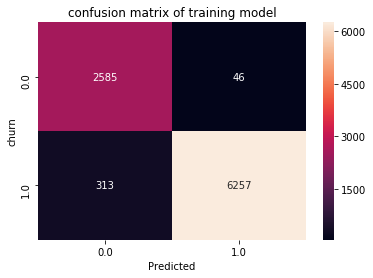

In [128]:
train_pred["Predicted"]=train_pred["pred"].apply(lambda x: 1.0 if x > 0.673469 else 0.0)
sns.heatmap(pd.crosstab(train_pred["churn"],train_pred["Predicted"]),annot=True,fmt=".0f")
plt.title("confusion matrix of training model")
plt.show()

### Finding Confusion Matrix for Testing Data:-

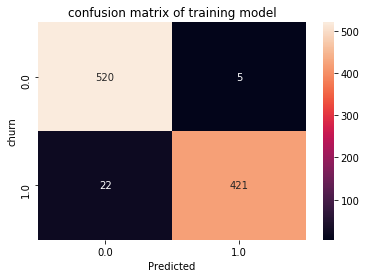

In [129]:
test_pred["Predicted"]=test_pred["pred"].apply(lambda x: 1.0 if x > 0.673469 else 0.0)
sns.heatmap(pd.crosstab(test_pred["churn"],test_pred["Predicted"]),annot=True,fmt=".0f")
plt.title("confusion matrix of training model")
plt.show()

In [130]:
out_of_sample_pred.head()

,churn,pred
17667,0.0,0.005446
17696,0.0,0.008138
17695,0.0,0.012917
17694,0.0,0.020458
17646,0.0,0.008784


### Confusion Matrix for Out Of Sample Data:-

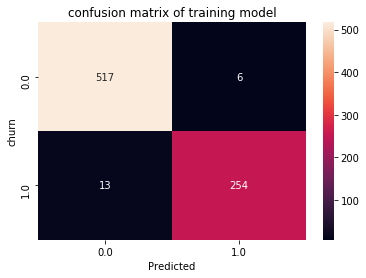

In [131]:
out_of_sample_pred["Predicted"]=out_of_sample_pred["pred"].apply(lambda x: 1.0 if x > 0.673469 else 0.0)
sns.heatmap(pd.crosstab(out_of_sample_pred["churn"],out_of_sample_pred["Predicted"]),annot=True,fmt=".0f")
plt.title("confusion matrix of training model")
plt.show()

In [132]:
print("training_accuracy=",metrics.accuracy_score(train_pred["churn"],train_pred["Predicted"]))
print("testing_accuracy=",metrics.accuracy_score(test_pred["churn"],test_pred["Predicted"]))
print("out_of_sample_accuracy=",metrics.accuracy_score(out_of_sample_pred["churn"],out_of_sample_pred["Predicted"]))

training_accuracy= 0.9609825019019672
testing_accuracy= 0.9721074380165289
out_of_sample_accuracy= 0.9759493670886076


## Using Random Forest Model:-

In [133]:
ran_model=RandomForestClassifier(n_estimators=100,oob_score=True)

In [134]:
ran_train=ran_model.fit(train_x,train_y)

In [135]:
ran_train_pred=pd.DataFrame({"Actual":train_y,"Predicted":ran_train.predict(train_x)})

In [136]:
ran_train_pred.head()

,Actual,Predicted
14029,1.0,1.0
17644,0.0,0.0
324,0.0,0.0
8492,1.0,1.0
3735,1.0,1.0


In [137]:
metrics.roc_auc_score(ran_pred.Actual,ran_pred.Predicted)

NameError: name 'ran_pred' is not defined

In [138]:
ran_test=ran_model.fit(test_x,test_y)

In [139]:
ran_test_pred=pd.DataFrame({"Actual":test_y,"Predicted":ran_test.predict(test_x)})

In [140]:
ran_test_pred.head()

,Actual,Predicted
44,1.0,1.0
15921,0.0,0.0
10412,1.0,1.0
3851,1.0,1.0
17706,0.0,0.0


In [141]:
metrics.roc_auc_score(ran_test_pred.Actual,ran_test_pred.Predicted)

1.0

## Decision Tree Model:-

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
dt_model=DecisionTreeClassifier(max_depth=3)

In [144]:
dt_train=dt_model.fit(train_x,train_y)

In [145]:
dt_train_pred=pd.DataFrame({"Actual":train_y,"Predicted":dt_train.predict(train_x)})

In [146]:
dt_train_pred.head()

,Actual,Predicted
14029,1.0,1.0
17644,0.0,0.0
324,0.0,0.0
8492,1.0,1.0
3735,1.0,1.0


In [147]:
metrics.roc_auc_score(dt_train_pred.Actual,dt_train_pred.Predicted)

0.9823963876941022

In [148]:
dt_test=dt_model.fit(train_x,train_y)

In [149]:
dt_test_pred=pd.DataFrame({"Actual":test_y,"Predicted":dt_test.predict(test_x)})

In [150]:
dt_test_pred.head()

,Actual,Predicted
44,1.0,1.0
15921,0.0,0.0
10412,1.0,1.0
3851,1.0,1.0
17706,0.0,0.0


In [151]:
metrics.roc_auc_score(dt_test_pred.Actual,dt_test_pred.Predicted)

0.9780921926418462

####  Using grid search cv for fine tunning the parameters:-

In [152]:
from sklearn.grid_search import GridSearchCV

C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
param_grid=({"max_depth":np.arange(3,12),"max_features":np.arange(3,7)})

In [ ]:
gs_model=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5).fit(train_x,train_y)

In [ ]:
gs_model.best_params_

In [ ]:
gs_model.best_score_

In [ ]:
# final Decision Tree model:-

dt_final=DecisionTreeClassifier(max_depth=4,max_features=6)

In [ ]:
dt_final_test=dt_final.fit(test_x,test_y)

In [ ]:
dt_test_pred=pd.DataFrame({'Actual':test_y,'Predicted':dt_final_test.predict(test_x)})

In [ ]:
dt_test_pred.head()

In [ ]:
metrics.accuracy_score(dt_test_pred.Actual,dt_test_pred.Predicted)

### Result:-
####            Model working good for all different time windows datset, it predict values with almost same accuracy. Churn is highly depends on Activity description, avg donation and recency. Random forest model perform better as compair to other models. 

In [155]:
train_pred.columns

Index(['churn', 'pred', 'Predicted'], dtype='object')

### Performing Decile Analysis:-

In [157]:
train_pred["Deciles"]=pd.qcut(train_pred["pred"],10,labels=False)

In [159]:
train_pred.head()

,churn,pred,Predicted,Deciles
68,1.0,0.311484,0.0,2
39,0.0,0.084865,0.0,2
40,0.0,0.086822,0.0,2
41,0.0,0.999999,1.0,9
43,0.0,0.084877,0.0,2


In [161]:
test_pred["Deciles"]=pd.qcut(test_pred["pred"],10,labels=False)

In [162]:
test_pred.head()

,churn,pred,Predicted,Deciles
16179,0.0,0.021023,0.0,1
16177,0.0,0.022030,0.0,3
16176,1.0,1.000000,1.0,9
16175,0.0,0.021559,0.0,2
16174,1.0,1.000000,1.0,9


In [163]:
train_decile_res=train_pred[["Deciles","pred"]].groupby(train_pred.Deciles).sum().sort_index(ascending=False)

In [164]:
train_decile_res

,Deciles,pred
Deciles,,
9,8280,919.999736
8,7360,919.986948
7,6440,918.881398
6,5520,913.849160
5,4600,913.240114
4,3680,912.624838
3,2760,813.632923
2,1840,114.691070
1,920,77.661201


In [165]:
test_decile_res=test_pred[["Deciles","pred"]].groupby(test_pred.Deciles).sum().sort_index(ascending=False)

In [166]:
test_decile_res

,Deciles,pred
Deciles,,
9,873,96.998261
8,776,96.920009
7,672,95.879866
6,582,96.856271
5,485,46.102619


In [167]:
train_pred.shape

(9201, 4)

In [170]:
train_decile_res["Left_Pct"]=((train_decile_res["pred"])/(train_decile_res["pred"].sum()))*100

In [169]:
test_decile_res["Left_Pct"]=((test_decile_res["pred"])/(test_decile_res["pred"].sum()))*100

In [172]:
train_pred.shape

(9201, 4)

In [173]:
train_decile_res["Left_rate"]=train_decile_res["pred"]/9201

In [174]:
test_pred.shape

(968, 4)

In [175]:
test_decile_res["Left_rate"]=test_decile_res["pred"]/968

In [176]:
train_decile_res

,Deciles,pred,Left_rate,Left_Pct
Deciles,,,,
9,8280,919.999736,0.099989,14.003040
8,7360,919.986948,0.099988,14.002845
7,6440,918.881398,0.099868,13.986018
6,5520,913.849160,0.099321,13.909424
5,4600,913.240114,0.099254,13.900154
4,3680,912.624838,0.099188,13.890789
3,2760,813.632923,0.088429,12.384063
2,1840,114.691070,0.012465,1.745678
1,920,77.661201,0.008441,1.182058


In [177]:
test_decile_res

,Deciles,pred,Left_Pct,Left_rate
Deciles,,,,
9,873,96.998261,21.895770,0.100205
8,776,96.920009,21.878106,0.100124
7,672,95.879866,21.643311,0.099049
6,582,96.856271,21.863718,0.100058
5,485,46.102619,10.406912,0.047627
4,388,2.750340,0.620844,0.002841
3,288,2.141260,0.483354,0.002212
2,186,2.002977,0.452139,0.002069
1,101,2.095565,0.473040,0.002165
